<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday8nov!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=3)
df['Visit-Return Cluster'] = agglom.fit_predict(df[['Website Visit Frequency', 'Return Rate (%)']])
print(df['Visit-Return Cluster'].value_counts())

Visit-Return Cluster
0    12
2     5
1     3
Name: count, dtype: int64


In [6]:
from scipy.stats import zscore
df['Return Z-Score'] = zscore(df['Return Rate (%)'])
outliers = df[df['Return Z-Score'].abs() > 2]
print(outliers[['Customer ID', 'Return Rate (%)']])

Empty DataFrame
Columns: [Customer ID, Return Rate (%)]
Index: []


In [8]:
df['Income Encoded'] = df['Income Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
correlation = df[['Income Encoded', 'Total Spent']].corr().iloc[0, 1]
print("Correlation:", correlation)

Correlation: 0.029876383382947232


In [9]:
df['Tenure Groups'] = pd.cut(df['Customer Tenure (Years)'], bins=[0, 3, 6, 9, 15], labels=['0-3', '3-6', '6-9', '9-15'])
tenure_conversion = df.groupby('Tenure Groups')['Converted'].mean()
print(tenure_conversion)

Tenure Groups
0-3     0.750000
3-6     0.666667
6-9     0.666667
9-15    0.428571
Name: Converted, dtype: float64


<ipython-input-9-0e7711723b10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_conversion = df.groupby('Tenure Groups')['Converted'].mean()


In [10]:
top_purchased_by_region = df.groupby(['Region', 'Purchased Category']).size().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)
print(top_purchased_by_region)

Region  Purchased Category
East    Home Goods            3
        Beauty                2
        Electronics           2
North   Home Goods            2
        Books                 1
        Electronics           1
South   Clothing              1
West    Books                 3
        Beauty                1
        Clothing              1
dtype: int64


In [11]:
campaign_sales = df.groupby('Campaign')['Total Spent'].sum()
print(campaign_sales)

Campaign
Black Friday    1960
Summer Sale      850
Winter Sale     3300
Name: Total Spent, dtype: int64


In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN Cluster'] = dbscan.fit_predict(df[['Age', 'Total Spent']])
print(df['DBSCAN Cluster'].value_counts())

DBSCAN Cluster
-1    20
Name: count, dtype: int64


In [13]:
df['Purchase Frequency'] = df['Total Spent'] / df['Customer Tenure (Years)']
print(df[['Customer ID', 'Purchase Frequency']].head())

   Customer ID  Purchase Frequency
0            1           37.500000
1            2           50.000000
2            3           66.666667
3            4           28.571429
4            5           25.000000


<ipython-input-14-1892a2cdb77b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total Spent'], shade=True)


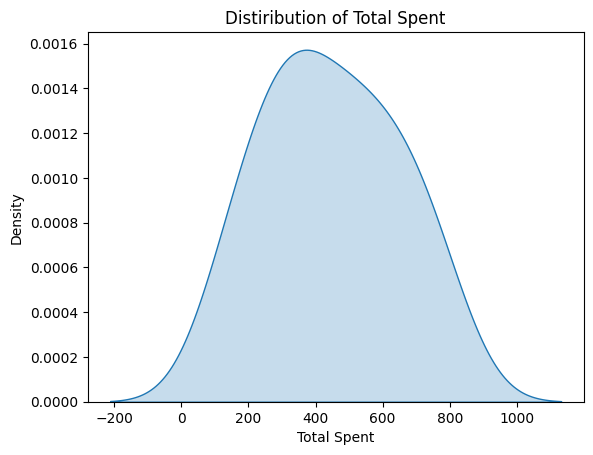

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['Total Spent'], shade=True)
plt.title('Distiribution of Total Spent')
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Customer ID'], axis=1)
y = df['Total Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
print("Pipeline Model Accuracy:", pipeline.score(X_test, y_test))

ValueError: could not convert string to float: 'F'

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ['Gender', 'Campaign']
numerical_features = ['Age', 'Customer Tenure (Years)', 'Purchase Frequency']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X = df.drop(['Customer ID', 'Total Spent'], axis=1)
y = df['Total Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
print("Pipeline Model Accuracy:", pipeline.score(X_test, y_test))

Pipeline Model Accuracy: 0.0
